In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables 
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent 

('2017-08-23',)

2016-08-23 00:00:00


Text(0.5, 1.0, 'precipitation by date')

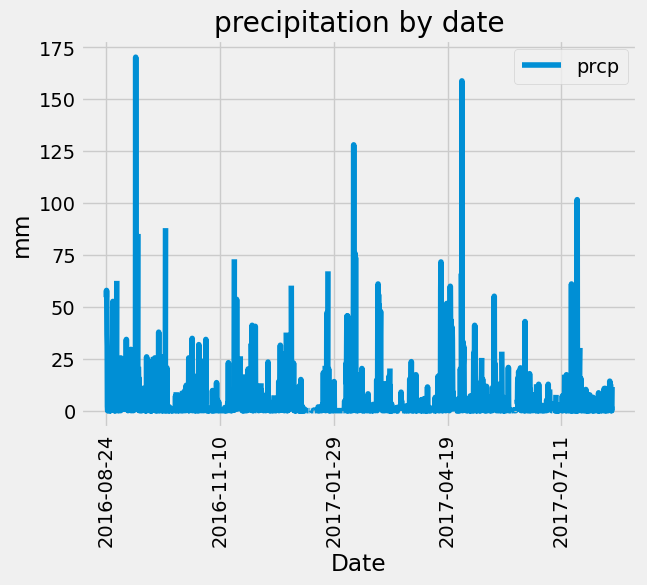

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
from datetime import datetime
most_recent_date = datetime.strptime(most_recent[0], "%Y-%m-%d")

# Calculate the date one year from the last date in data set.
query_date = most_recent_date - dt.timedelta(days = 365)
print(query_date)

# Perform a query to retrieve the data and precipitation scores

twelve_month_prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= query_date).all()
                                                                             
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(twelve_month_prcp, columns = ["date", "prcp"])

# Sort the dataframe by date
df = df.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data

df.plot(x = "date" , y="prcp", rot=90)
plt.xlabel("Date")
plt.ylabel("mm")
plt.title(f"precipitation by date")

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df["prcp"].describe()

count    2015.000000
mean        4.485112
std        11.690532
min         0.000000
25%         0.000000
50%         0.500000
75%         3.300000
max       170.200000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Measurement.station).group_by(Measurement.station).count()
station_count

9

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active = session.query(Measurement.station,func.count(Measurement.date)).group_by(Measurement.station).\
                order_by(func.count(Measurement.date).desc()).first()
print(most_active)

record_count = session.query(Measurement.station,func.count(Measurement.date)).group_by(Measurement.station).\
                order_by(func.count(Measurement.date).desc()).all()
record_count 

('USC00519281', 2772)


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]
most_avtive_analysis = session.query(*sel).filter(Measurement.station == most_active[0]).all()
most_avtive_analysis 
for each in most_avtive_analysis:
    print(f"The lowest temprature for the most active station is: {each[0]}")
    print(f"The highest temprature for the most active station is: {each[1]}")
    print(f"The average temprature for the most active station is: {each[2]}")

The lowest temprature for the most active station is: 12.2
The highest temprature for the most active station is: 29.4
The average temprature for the most active station is: 22.03582251082252


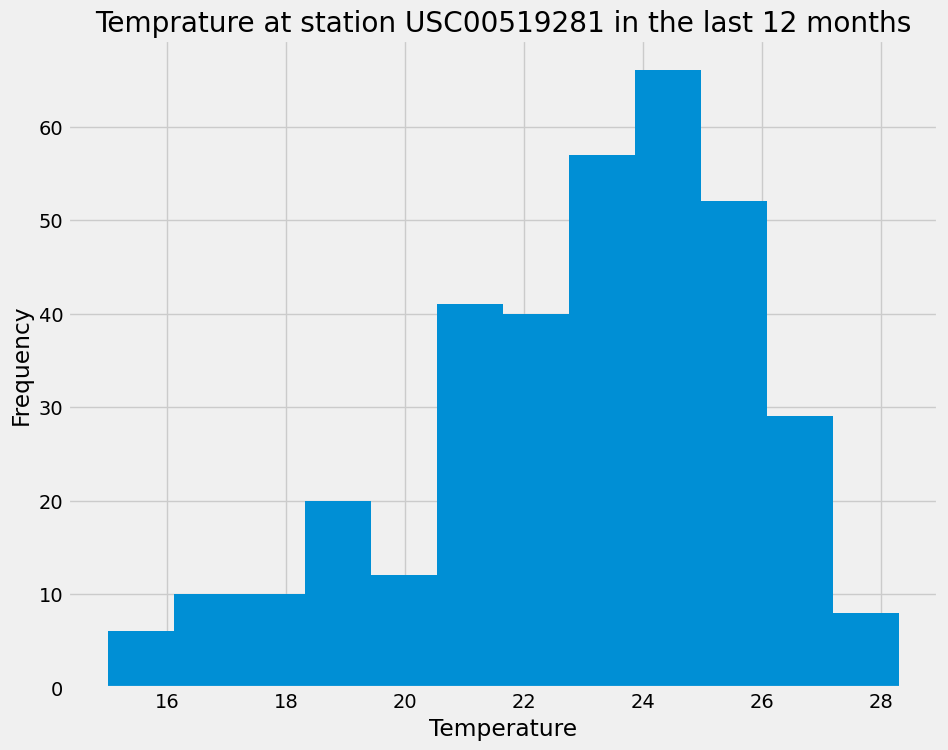

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
twelve_month_temp = session.query(Measurement.date, Measurement.tobs).\
filter(Measurement.station == most_active[0]).filter(Measurement.date >query_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df1 = pd.DataFrame(twelve_month_temp, columns = ["date", "tobs"])
df1.set_index("date", inplace = True)
df1.hist(bins = 12, figsize =(10,8))
plt.title(f"Temprature at station {most_active[0]} in the last 12 months")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

# Close session

In [16]:
# Close Session
session.close()